## A research was conducted recently by state government to collect some health specific statistics for different cities from 5 different states, the objective of the research was to collect the health and  medical facilities specific attributes of the cities which directly/indirectly impact the overall health status of the city.The objective is to find the attributes and their relation with death rate in order to take the necessary steps to prevent higher death rate.

#### 1. Data Processing ####
#### 1.1 Get the data
### Data : health_data for different cities of 5 states

In [76]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [77]:
df = pd.read_csv('Health_data_new.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
City_ID                       2000 non-null int64
State                         2000 non-null object
doctor_availability_rate      2000 non-null float64
hospital_availability_rate    2000 non-null float64
annual_per_capita             2000 non-null float64
population_density            2000 non-null float64
death_rate                    1967 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 109.5+ KB


In [79]:
df.describe()

,City_ID,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1967.000000
mean,1999.500000,584.579841,663.231582,18.222888,37.277126,9.290993
std,577.494589,144.085315,151.363999,3.595416,7.145640,1.724680
min,1000.000000,44.155200,86.663459,4.009732,10.894868,3.186223
25%,1499.750000,509.065656,577.497153,16.229899,33.401743,8.322182
50%,1999.500000,593.901162,676.518731,18.491890,37.778280,9.437314
75%,2499.250000,676.737022,764.318146,20.516293,41.861463,10.376068
max,2999.000000,952.193953,1068.699512,28.095823,54.896516,13.316359


In [80]:
df.head()

,City_ID,State,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate
0,1000,s104,773.177527,823.579167,21.622655,27.606263,7.448700
1,1001,s105,525.493029,607.302537,19.123286,40.786864,10.081136
2,1002,s101,574.615664,627.912321,17.670255,41.327670,9.795441
3,1003,s104,593.601517,640.842500,19.234267,34.235168,9.545358
4,1004,s103,462.664965,533.419684,16.171985,44.218356,10.649668


In [81]:
pd.isna(df.death_rate).value_counts()

False    1967
True       33
Name: death_rate, dtype: int64

In [82]:
df.mean()['death_rate']

9.29099259264769

In [83]:
df['death_rate'] = df['death_rate'].fillna(df.mean()['death_rate'])

In [84]:
pd.isna(df.death_rate).value_counts()

False    2000
Name: death_rate, dtype: int64

#### 1.2  Categorical Data Handling using One hot Encoding

In [85]:
object_cols = list(df.select_dtypes(include=['category','object']))

In [86]:
object_cols

['State']

In [87]:
#d1_info = pd.DataFrame({'id':['1','2','3'],'date':['01/21/1990','02-24-1992','01-21-1991']})

In [88]:
#d1_info

In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [90]:
le = LabelEncoder()

In [91]:
ohe = OneHotEncoder(sparse=False)

In [92]:
state_le = le.fit_transform(df.State)

In [93]:
state_le

array([3, 4, 0, ..., 0, 4, 0])

In [94]:
state_le = state_le.reshape(len(state_le),1)

In [95]:
state_le

array([[3],
       [4],
       [0],
       ...,
       [0],
       [4],
       [0]])

In [96]:
state_ohe = ohe.fit(state_le)

In [97]:
state_new  = state_ohe.fit_transform(state_le)

In [98]:
state_new

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [99]:
state_new = pd.DataFrame(state_new)

In [100]:
state_new.head()

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [101]:
state_new.columns = ['s1','s2','s3','s4','s5']

In [102]:
df = df.join(state_new[['s1','s2','s3','s4']])

In [103]:
df.head()

,City_ID,State,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate,s1,s2,s3,s4
0,1000,s104,773.177527,823.579167,21.622655,27.606263,7.448700,0.0,0.0,0.0,1.0
1,1001,s105,525.493029,607.302537,19.123286,40.786864,10.081136,0.0,0.0,0.0,0.0
2,1002,s101,574.615664,627.912321,17.670255,41.327670,9.795441,1.0,0.0,0.0,0.0
3,1003,s104,593.601517,640.842500,19.234267,34.235168,9.545358,0.0,0.0,0.0,1.0
4,1004,s103,462.664965,533.419684,16.171985,44.218356,10.649668,0.0,0.0,1.0,0.0


In [104]:
df.drop('State', axis =1 , inplace=True)

In [105]:
df.head()

,City_ID,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate,s1,s2,s3,s4
0,1000,773.177527,823.579167,21.622655,27.606263,7.448700,0.0,0.0,0.0,1.0
1,1001,525.493029,607.302537,19.123286,40.786864,10.081136,0.0,0.0,0.0,0.0
2,1002,574.615664,627.912321,17.670255,41.327670,9.795441,1.0,0.0,0.0,0.0
3,1003,593.601517,640.842500,19.234267,34.235168,9.545358,0.0,0.0,0.0,1.0
4,1004,462.664965,533.419684,16.171985,44.218356,10.649668,0.0,0.0,1.0,0.0



#### 1.3 Splitting data into Training and Test Data Sets

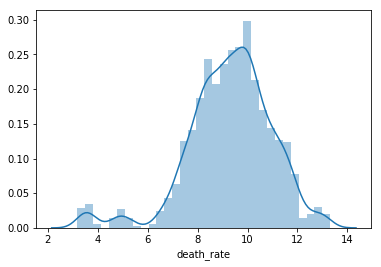

In [106]:
import seaborn as sns

sns.distplot(df.death_rate)

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
City_ID                       2000 non-null int64
doctor_availability_rate      2000 non-null float64
hospital_availability_rate    2000 non-null float64
annual_per_capita             2000 non-null float64
population_density            2000 non-null float64
death_rate                    2000 non-null float64
s1                            2000 non-null float64
s2                            2000 non-null float64
s3                            2000 non-null float64
s4                            2000 non-null float64
dtypes: float64(9), int64(1)
memory usage: 156.3 KB


In [109]:
df_X = df.iloc[:,[0,1,2,3,4,6,7,8,9]]

In [110]:
df_y = df[:]['death_rate']

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state = 1000)

In [112]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 1892 to 1459
Data columns (total 9 columns):
City_ID                       1400 non-null int64
doctor_availability_rate      1400 non-null float64
hospital_availability_rate    1400 non-null float64
annual_per_capita             1400 non-null float64
population_density            1400 non-null float64
s1                            1400 non-null float64
s2                            1400 non-null float64
s3                            1400 non-null float64
s4                            1400 non-null float64
dtypes: float64(8), int64(1)
memory usage: 109.4 KB


In [113]:
Y_train.head()

1892     8.973993
343     10.613118
1903     8.490494
16       8.031373
1250    10.168406
Name: death_rate, dtype: float64

In [114]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 82 to 1911
Data columns (total 9 columns):
City_ID                       600 non-null int64
doctor_availability_rate      600 non-null float64
hospital_availability_rate    600 non-null float64
annual_per_capita             600 non-null float64
population_density            600 non-null float64
s1                            600 non-null float64
s2                            600 non-null float64
s3                            600 non-null float64
s4                            600 non-null float64
dtypes: float64(8), int64(1)
memory usage: 46.9 KB


In [115]:
Y_test.head()

82      8.822349
1935    8.415495
1639    8.437211
1591    9.598652
1433    9.290993
Name: death_rate, dtype: float64

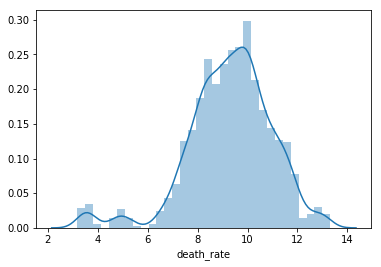

In [116]:
sns.distplot(df.death_rate)

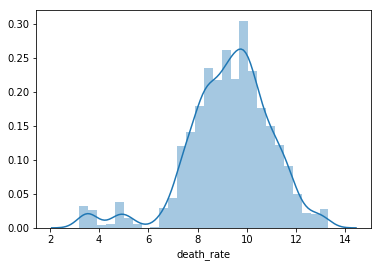

In [117]:
sns.distplot(Y_train)

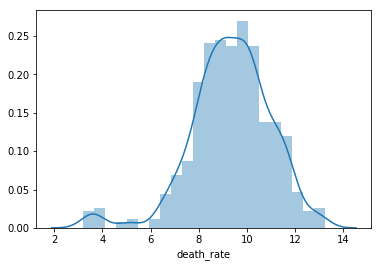

In [118]:
sns.distplot(Y_test)


#### 2 building ML Models

## 2.1 Multiple Linear Regression

### Dependent variable : death_rate
### Independent variables : Doctor_availability_rate,hospital_availability_rate,
### annual_per_capita,population_density, state (s1,s2,s3,s4,s5)

## Death Rate(y) = B0 + B1*doctor_availability_rate + B2*hospital_availability_rate +
## B3*annual_per_capita + B4*population_density + B5*s1 + B6*s2 +B7*s3 + B8*s4

## Feature Selection - Checking Correlation to get perfect set of independent variables

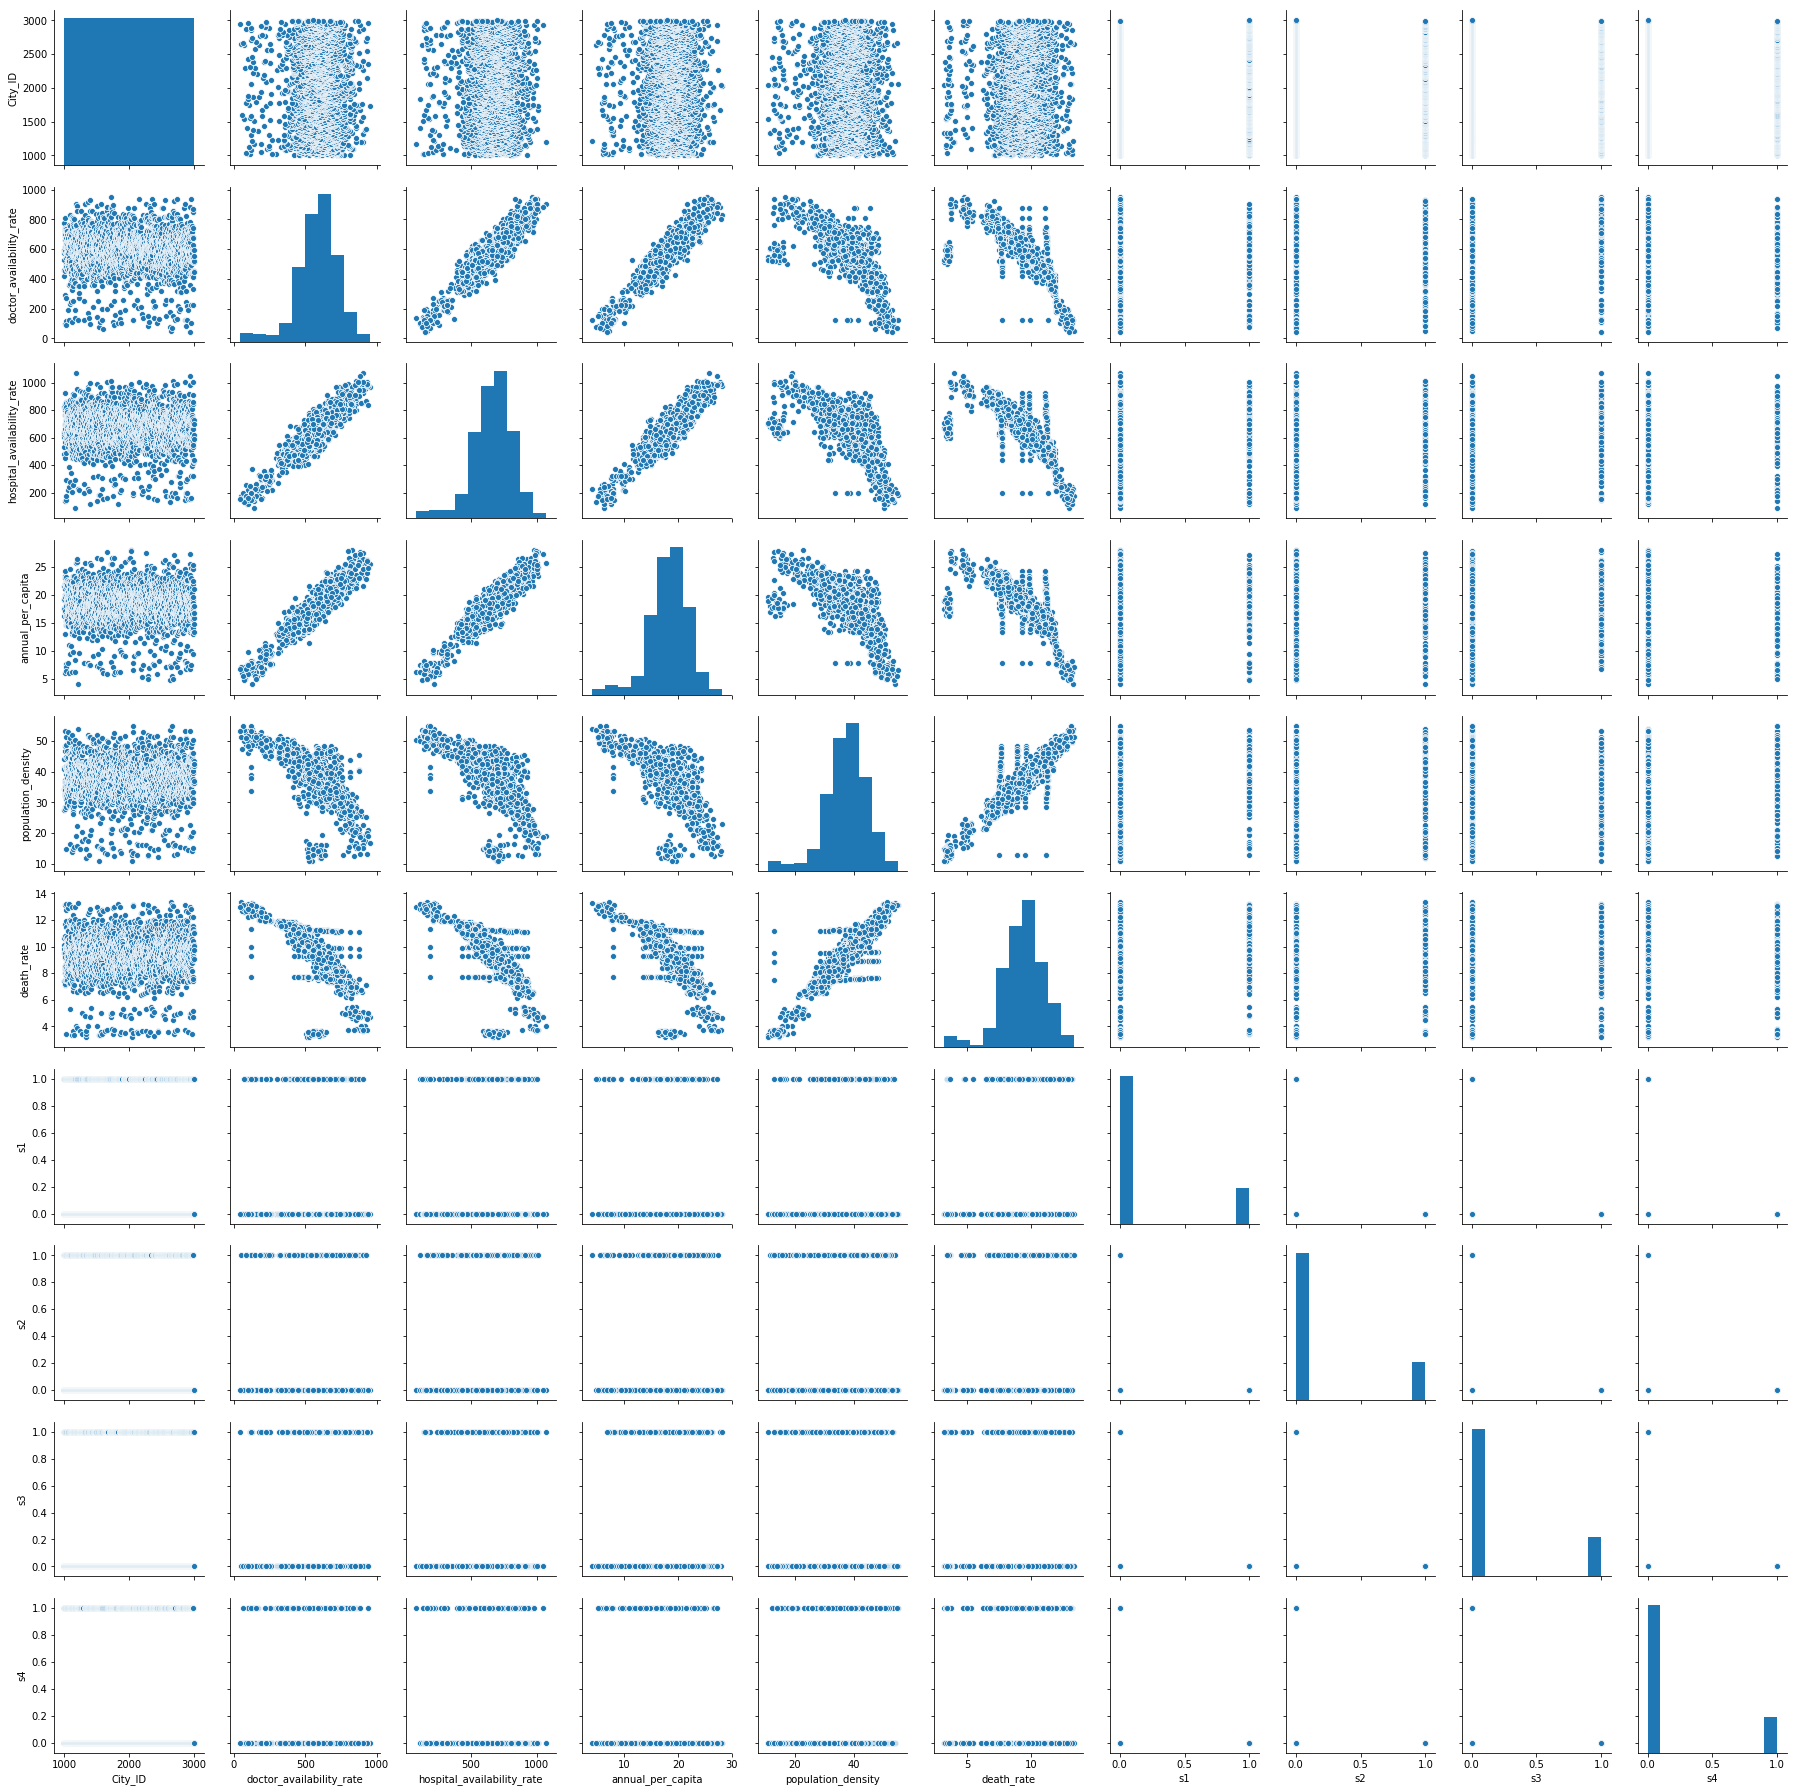

In [119]:
sns.pairplot(df)

In [121]:
cr = df.corr()

In [122]:
cr

,City_ID,doctor_availability_rate,hospital_availability_rate,annual_per_capita,population_density,death_rate,s1,s2,s3,s4
City_ID,1.000000,-0.013705,-0.000842,-0.011874,-0.010326,0.007108,-0.004374,-0.012282,0.001578,-0.009829
doctor_availability_rate,-0.013705,1.000000,0.920881,0.924345,-0.709803,-0.767827,0.002371,-0.006293,0.030443,-0.005280
hospital_availability_rate,-0.000842,0.920881,1.000000,0.921813,-0.720216,-0.775418,0.015040,-0.009342,0.029835,-0.014622
annual_per_capita,-0.011874,0.924345,0.921813,1.000000,-0.710764,-0.768331,-0.001736,-0.003638,0.031988,-0.011468
population_density,-0.010326,-0.709803,-0.720216,-0.710764,1.000000,0.898443,0.011035,0.005094,-0.030194,0.004276
death_rate,0.007108,-0.767827,-0.775418,-0.768331,0.898443,1.000000,0.005175,0.000067,-0.029441,0.009149
s1,-0.004374,0.002371,0.015040,-0.001736,0.011035,0.005175,1.000000,-0.249568,-0.256864,-0.244554
s2,-0.012282,-0.006293,-0.009342,-0.003638,0.005094,0.000067,-0.249568,1.000000,-0.262961,-0.250360
s3,0.001578,0.030443,0.029835,0.031988,-0.030194,-0.029441,-0.256864,-0.262961,1.000000,-0.257678
s4,-0.009829,-0.005280,-0.014622,-0.011468,0.004276,0.009149,-0.244554,-0.250360,-0.257678,1.000000


In [123]:
cr['death_rate']

City_ID                       0.007108
doctor_availability_rate     -0.767827
hospital_availability_rate   -0.775418
annual_per_capita            -0.768331
population_density            0.898443
death_rate                    1.000000
s1                            0.005175
s2                            0.000067
s3                           -0.029441
s4                            0.009149
Name: death_rate, dtype: float64

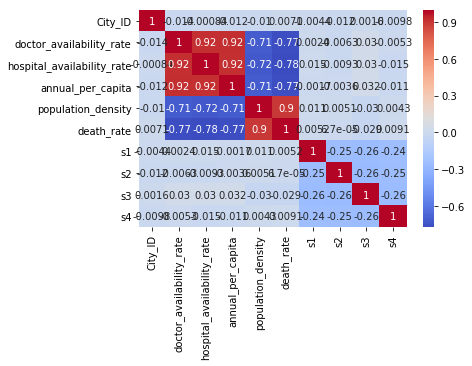

In [124]:
sns.heatmap(cr,annot=True,cmap="coolwarm")

## Conclusion - Selected independent variables :doctor_availability_rate, hospital_availability_rate,
### annual_per_capita,population_density

In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 1892 to 1459
Data columns (total 9 columns):
City_ID                       1400 non-null int64
doctor_availability_rate      1400 non-null float64
hospital_availability_rate    1400 non-null float64
annual_per_capita             1400 non-null float64
population_density            1400 non-null float64
s1                            1400 non-null float64
s2                            1400 non-null float64
s3                            1400 non-null float64
s4                            1400 non-null float64
dtypes: float64(8), int64(1)
memory usage: 109.4 KB


In [126]:
X_train.drop(['City_ID','s1','s2','s3'],axis=1,inplace=True)

In [127]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 1892 to 1459
Data columns (total 5 columns):
doctor_availability_rate      1400 non-null float64
hospital_availability_rate    1400 non-null float64
annual_per_capita             1400 non-null float64
population_density            1400 non-null float64
s4                            1400 non-null float64
dtypes: float64(5)
memory usage: 65.6 KB


In [128]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 82 to 1911
Data columns (total 9 columns):
City_ID                       600 non-null int64
doctor_availability_rate      600 non-null float64
hospital_availability_rate    600 non-null float64
annual_per_capita             600 non-null float64
population_density            600 non-null float64
s1                            600 non-null float64
s2                            600 non-null float64
s3                            600 non-null float64
s4                            600 non-null float64
dtypes: float64(8), int64(1)
memory usage: 46.9 KB


In [129]:
X_test.drop(['City_ID','s1','s2','s3'],axis=1,inplace=True)

In [130]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 82 to 1911
Data columns (total 5 columns):
doctor_availability_rate      600 non-null float64
hospital_availability_rate    600 non-null float64
annual_per_capita             600 non-null float64
population_density            600 non-null float64
s4                            600 non-null float64
dtypes: float64(5)
memory usage: 28.1 KB


## Check for Linear Relation

In [132]:
import seaborn as sns; sns.set(color_codes=True)

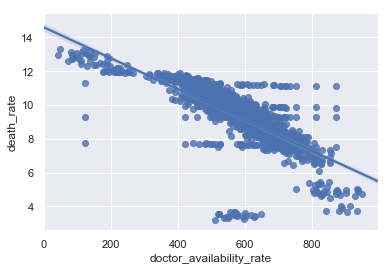

In [134]:
ax = sns.regplot(x=X_train.doctor_availability_rate, y=Y_train)

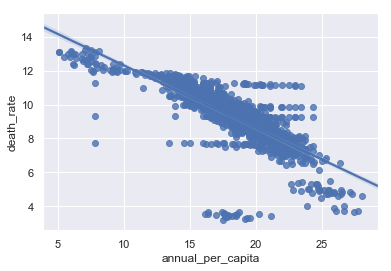

In [135]:
ax = sns.regplot(x=X_train.annual_per_capita, y=Y_train)

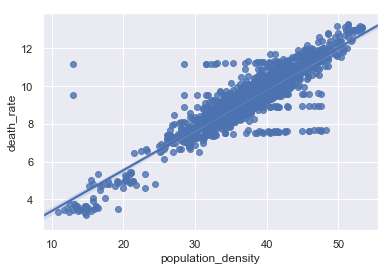

In [136]:
ax = sns.regplot(x=X_train.population_density, y=Y_train)

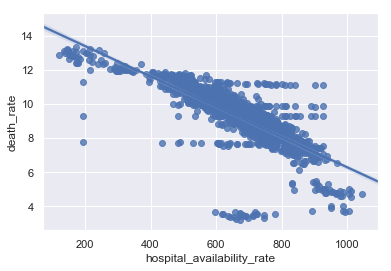

In [137]:
ax = sns.regplot(x=X_train.hospital_availability_rate, y=Y_train)


## Building Linear Model

In [138]:
from sklearn import linear_model

In [139]:
lr = linear_model.LinearRegression()


# Train the model using the training sets

In [140]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [141]:
lr.intercept_ # Beta 0 Value

5.392436184014235

In [142]:
lr.coef_  # b1, b2, b3, b4...

array([-0.00085722, -0.00097627, -0.06435067,  0.16643855,  0.01527145])

In [143]:
lr._residues # RSS

638.4191013827125


## Predicting death_rate for test dataset using model

In [144]:
y_pred = lr.predict(X_test)

In [145]:
y_pred

array([ 8.32984475,  8.44779022,  8.29893284, 10.5237762 ,  9.04847716,
        9.78492734, 10.32057121,  8.75027097, 10.13811689, 11.71047155,
        9.67473584,  8.85980467,  8.16400994,  7.55039469, 10.25784172,
       11.20895002, 10.1733463 ,  9.15251804, 10.79402931,  9.87977534,
        8.14229671,  9.31751057,  6.56855539,  7.17335577, 10.78276416,
       11.20108336,  9.62983082,  9.25278163,  7.91825265,  8.79671269,
        9.91774738,  8.8466587 ,  8.5463124 , 10.17621774, 10.32639134,
        8.52131888,  9.71128041, 10.75678726,  9.25583107,  6.03788263,
        9.9270182 ,  7.91462744,  8.05714237,  9.95097642,  8.22036043,
       12.7536434 ,  7.87700371,  9.15392716,  9.6866895 , 13.77496673,
        9.0948199 ,  9.09837157,  9.34309283,  8.95300342,  9.57439338,
        8.93326425,  9.08765294, 10.05787523,  7.94855367,  8.7554321 ,
        7.14981932,  5.96992844,  7.85129929, 11.21467577,  9.92662085,
        8.6430938 ,  8.96204617,  8.06716868,  6.48980806,  8.43

In [147]:
res = pd.DataFrame({'y_act':Y_test,'y_pred':y_pred})

In [148]:
res

,y_act,y_pred
82,8.822349,8.329845
1935,8.415495,8.447790
1639,8.437211,8.298933
1591,9.598652,10.523776
1433,9.290993,9.048477
101,8.921712,9.784927
969,11.052352,10.320571
717,8.161986,8.750271
1064,11.158706,10.138117
1491,11.907148,11.710472


## Evaluate your model using RMSE

In [150]:
import math

math.sqrt(((Y_test-y_pred)**2).mean())

0.6679492786882499

## Analyze your model performance visually

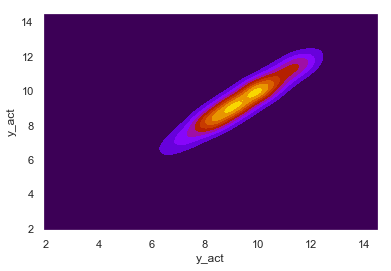

In [151]:
sns.kdeplot(data=res.y_act,data2=res.y_act,shade=True,cmap="gnuplot")

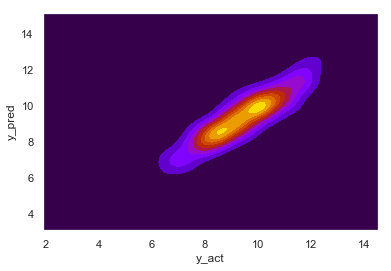

In [152]:

sns.kdeplot(data=res.y_act,data2=res.y_pred,shade=True,cmap="gnuplot")

In [153]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [154]:
res = res.sort_values(by='y_act')

In [155]:
res

,y_act,y_pred
1039,3.186223,4.844522
549,3.372307,5.759781
281,3.428081,6.037883
33,3.435722,5.569502
1323,3.616548,5.632398
1201,3.624105,5.797177
1444,3.646909,5.455805
1701,3.650442,5.790748
337,3.652495,5.023146
1865,3.700971,4.561950


In [157]:
x1 = np.arange(1,len(Y_test)+1)

In [159]:
y1 = res.y_act

In [160]:
y2 = res.y_pred

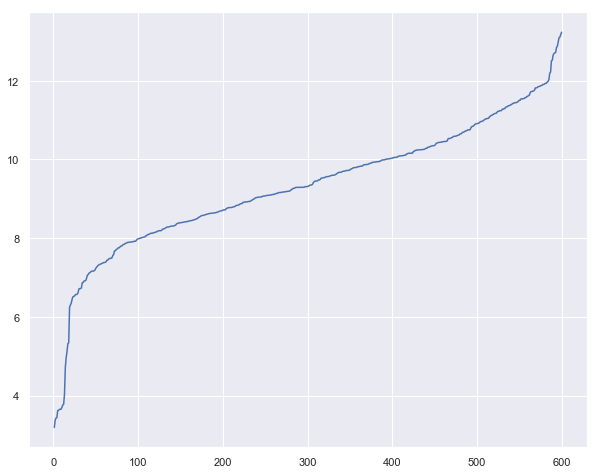

In [163]:
figure( figsize=(10, 8))
plt.plot(x1, y1)

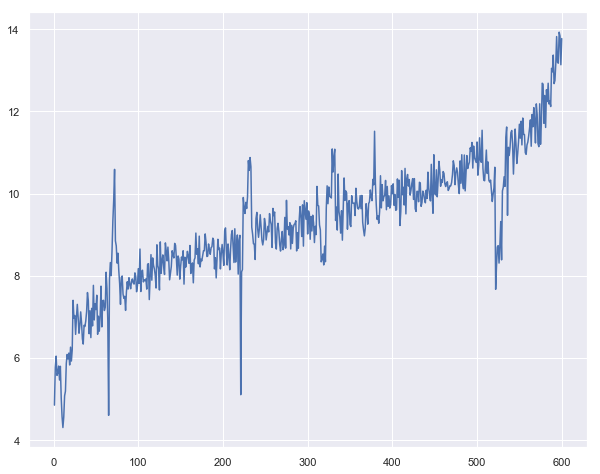

In [164]:
figure( figsize=(10, 8))
plt.plot(x1,y2)

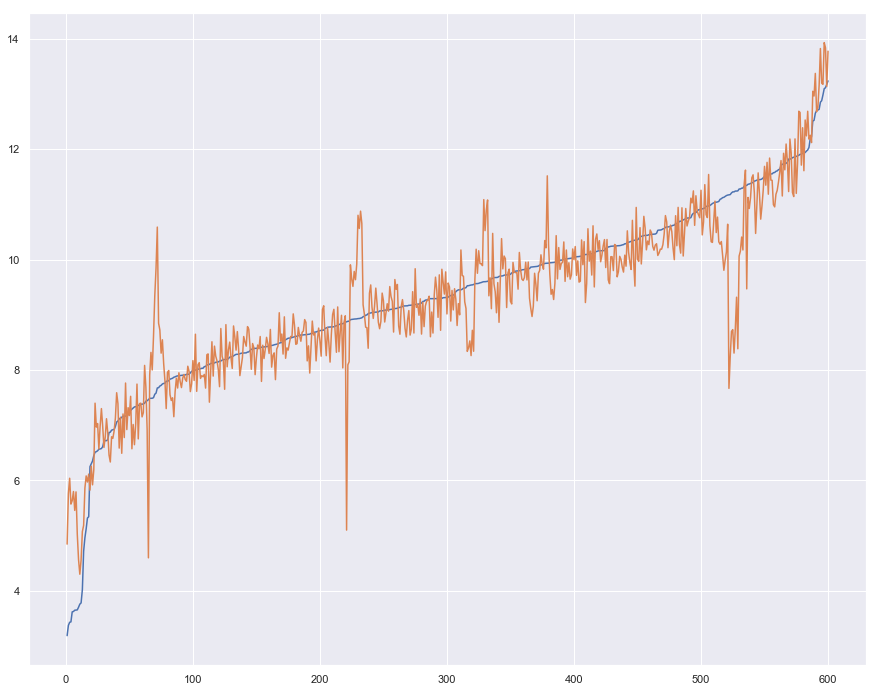

In [165]:
figure( figsize=(15, 12))
plt.plot(x1, y1,x1,y2)

## Analyze the error patterns

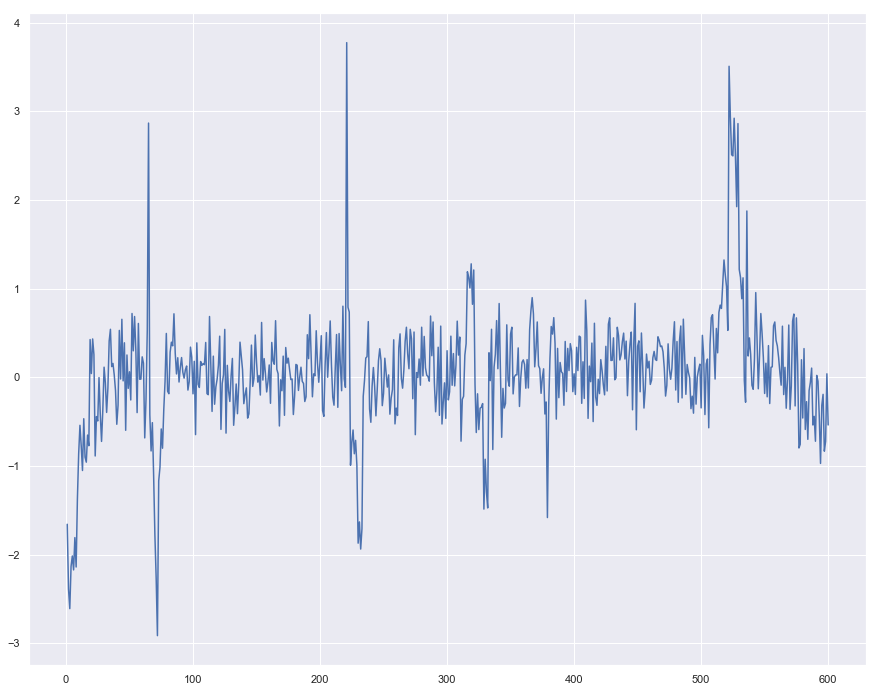

In [166]:
figure( figsize=(15, 12))
plt.plot(x1,y1-y2)